Логистическая регрессия, KNN, SVM и Наивный Байес, MLP. Classifier, классификация при множестве классов

Логистическая регрессия - логистическая регрессия применяется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков. Для этого вводится зависимая переменная y
, принимающая значения  
 и 
 и множество независимых переменных x1,.. n
 на основе значений которых требуется вычислить вероятность принятия того или иного значения зависимой перемен

KNN - метод ближайших соседей. Объект относим к тому классу, к которому относятся большинство из его k ближайших соседей.

SVM - основная идея метода заключается в построении гиперплоскости, разделяющей объекты выборки оптимальным способом. Алгоритм работает в предположении, что чем больше расстояние (зазор) между разделяющей гиперплоскостью и объектами разделяемых классов, тем меньше будет средняя ошибка классификатора.

Наивный Байес - простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими предположениями о независимости.

Нейронная сеть прямого распространения. Нейронная сеть без обратной связи, сигнал распространяется строго от входного слоя к выходному. Обучение происходит методом итеративного подбора коэффициентов нейронов для получения наиболее похожего результата на основе обучающей выборки. Т.к. здесь у нас классификация, то на выходе определяем, к какому классу из представленных относится объект.ной.

Датасет: https://www.kaggle.com/datasets/uciml/zoo-animal-classification

Будем по признакам распределать животных по 7 классам: млекопитающие, птицы, рептилии, рыбы, амфибии, насекомые и беспозвоночные

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
class1 = pd.read_csv('./zoo/class.csv')
class1

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [3]:
df = pd.read_csv('./zoo/zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.drop('animal_name', axis=1, inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [6]:
df.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [7]:
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

<Axes: >

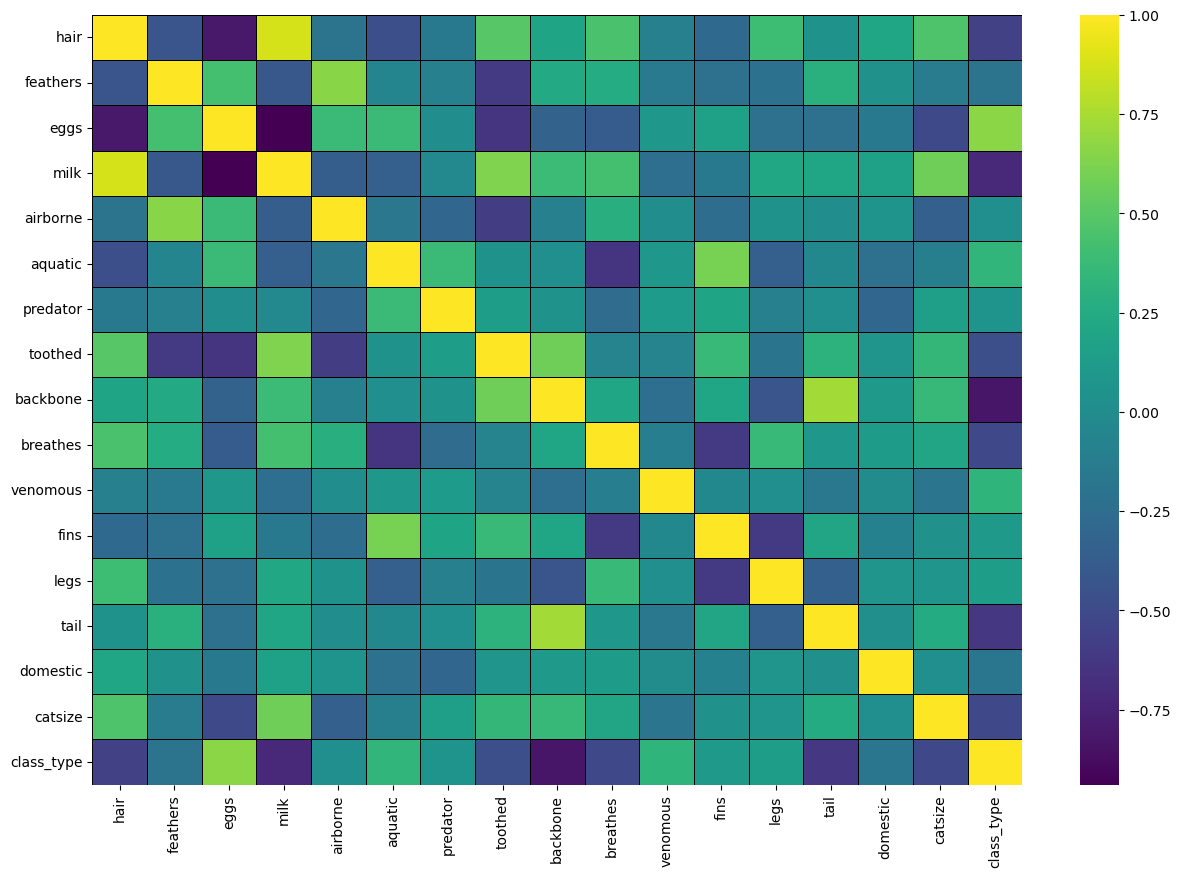

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap="viridis", linewidths=0.5, linecolor='black')

In [9]:
X = df.drop("class_type", axis=1)
y = df.class_type

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain, Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\nTraining Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f"Cross Validation Score : {round(model_score * 100,2)}")
    print(f"Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f"Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f"Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f"F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

In [12]:
LR = LogisticRegression()
LR.fit(X_train, y_train.ravel())
y_pred_LR = LR.predict(X_test)
print("Logistic Regression :")
Evaluate_Performance(LR, X_train, X_test, y_train, y_test)

Logistic Regression :

Training Accuracy Score :  100.0
Cross Validation Score : 97.32
Testing Accuracy Score :92.31
Precision Score is : 86.22
Recall Score is : 92.31
F1-Score Score is : 88.91


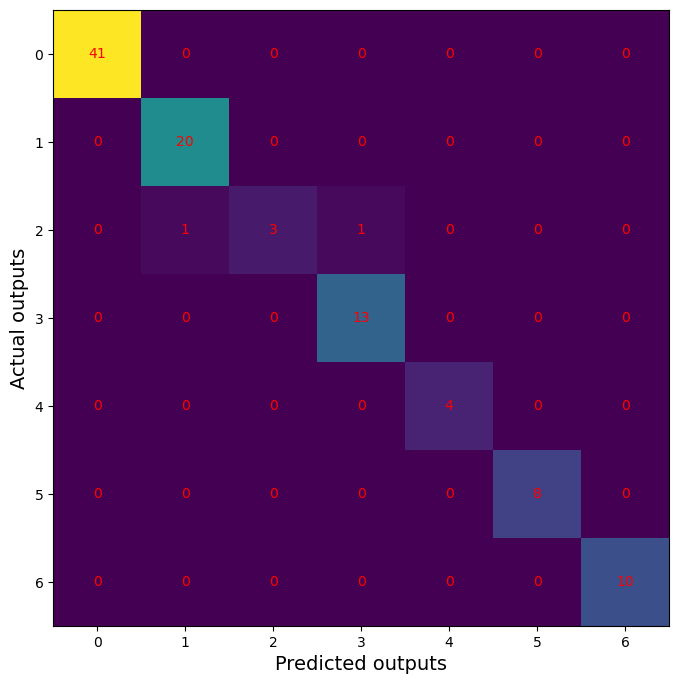

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [13]:
cm = confusion_matrix (y, LR.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

class1


KNN, 1 neighbors :

Training Accuracy Score :  100.0
Cross Validation Score : 95.89
Testing Accuracy Score :96.15
Precision Score is : 96.79
Recall Score is : 96.15
F1-Score Score is : 95.69


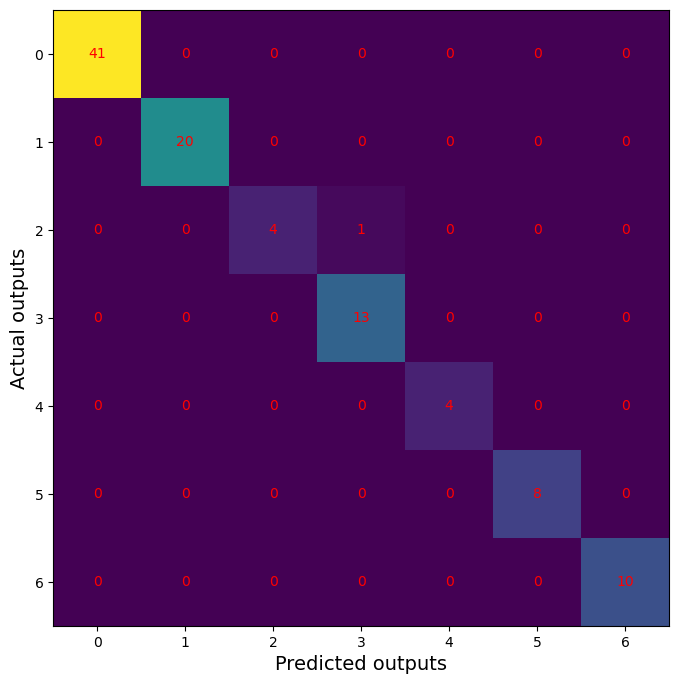

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 2 neighbors :

Training Accuracy Score :  97.33
Cross Validation Score : 94.46
Testing Accuracy Score :92.31
Precision Score is : 85.58
Recall Score is : 92.31
F1-Score Score is : 88.72


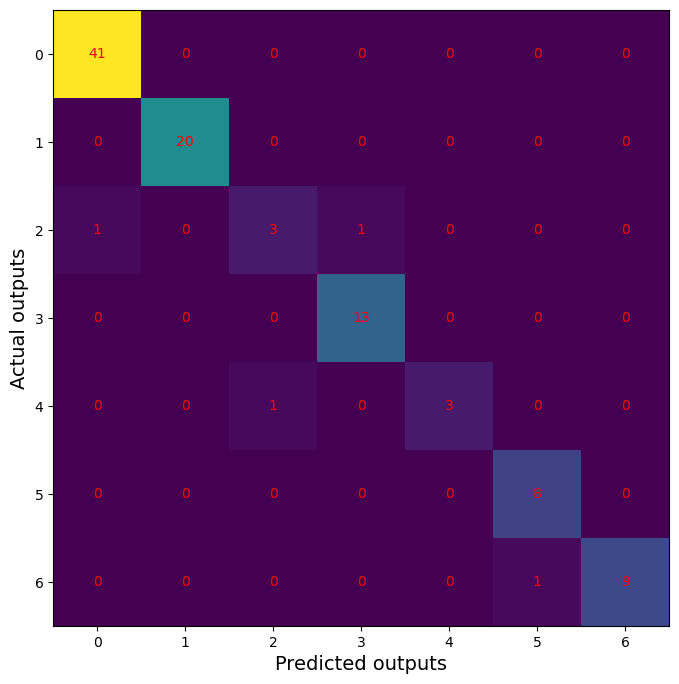

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 3 neighbors :

Training Accuracy Score :  97.33
Cross Validation Score : 92.14
Testing Accuracy Score :92.31
Precision Score is : 85.58
Recall Score is : 92.31
F1-Score Score is : 88.72


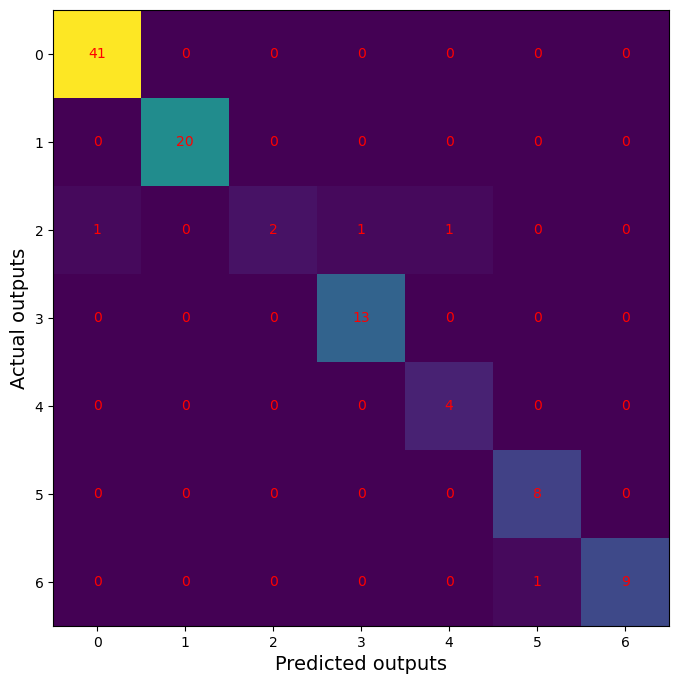

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 4 neighbors :

Training Accuracy Score :  97.33
Cross Validation Score : 89.64
Testing Accuracy Score :92.31
Precision Score is : 85.58
Recall Score is : 92.31
F1-Score Score is : 88.72


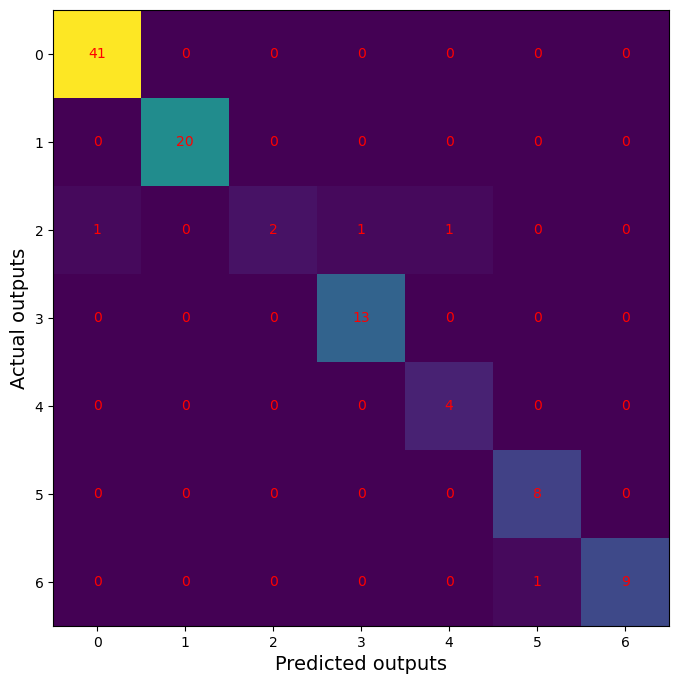

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 5 neighbors :

Training Accuracy Score :  93.33
Cross Validation Score : 90.71
Testing Accuracy Score :88.46
Precision Score is : 82.97
Recall Score is : 88.46
F1-Score Score is : 85.26


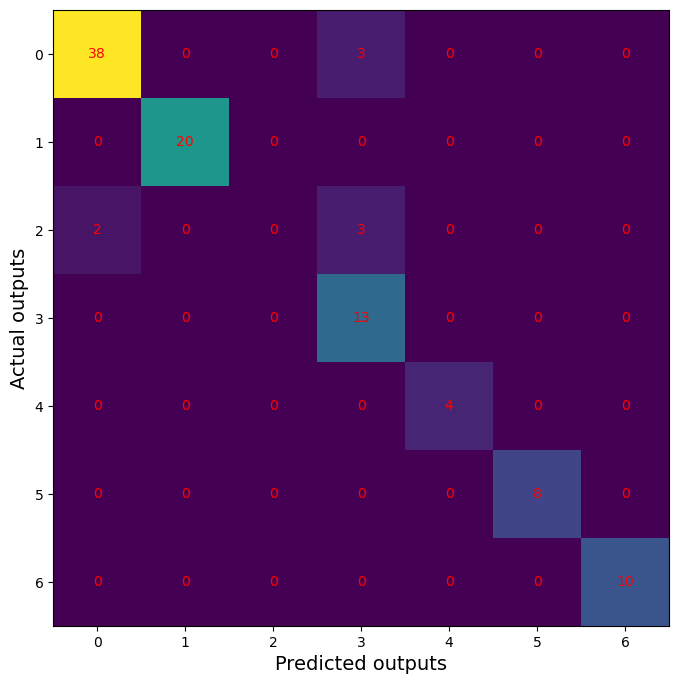

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 6 neighbors :

Training Accuracy Score :  92.0
Cross Validation Score : 86.79
Testing Accuracy Score :84.62
Precision Score is : 76.24
Recall Score is : 84.62
F1-Score Score is : 79.76


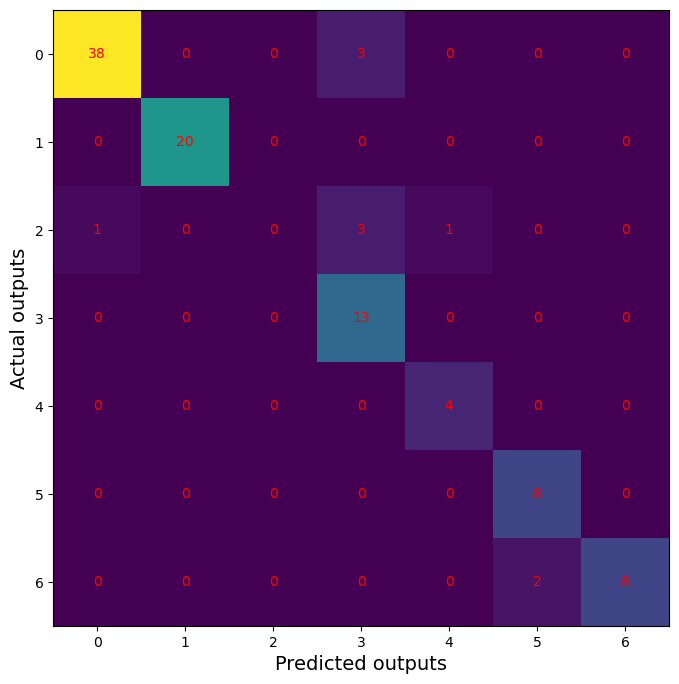

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 7 neighbors :

Training Accuracy Score :  92.0
Cross Validation Score : 82.68
Testing Accuracy Score :88.46
Precision Score is : 82.97
Recall Score is : 88.46
F1-Score Score is : 85.26


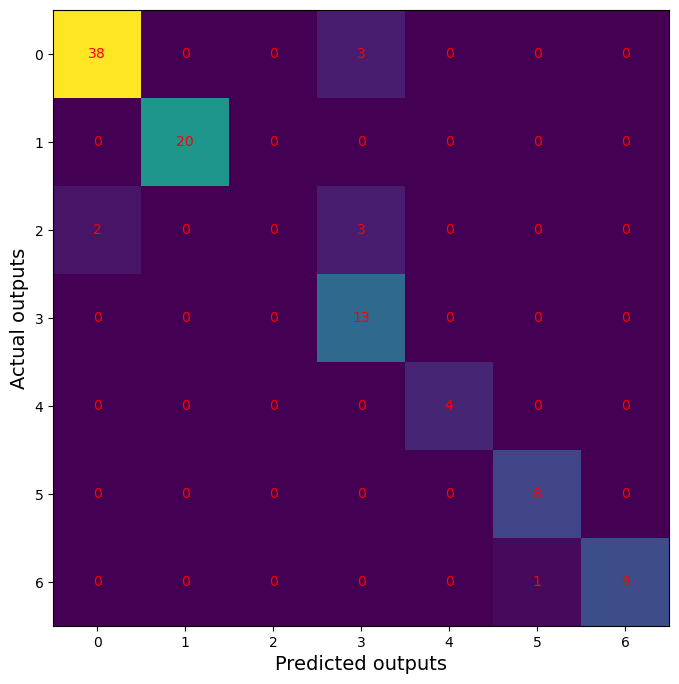

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 8 neighbors :

Training Accuracy Score :  88.0
Cross Validation Score : 78.75
Testing Accuracy Score :84.62
Precision Score is : 76.24
Recall Score is : 84.62
F1-Score Score is : 79.76


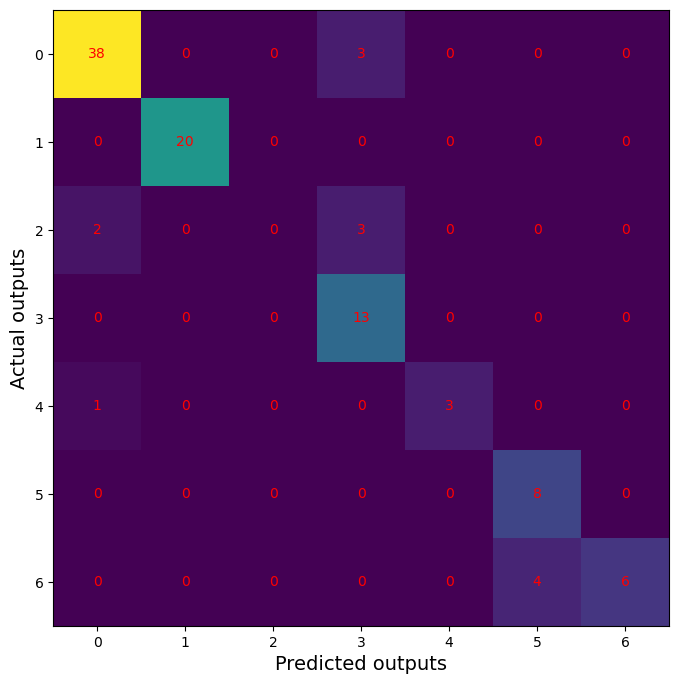

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 9 neighbors :

Training Accuracy Score :  84.0
Cross Validation Score : 78.75
Testing Accuracy Score :80.77
Precision Score is : 69.18
Recall Score is : 80.77
F1-Score Score is : 74.24


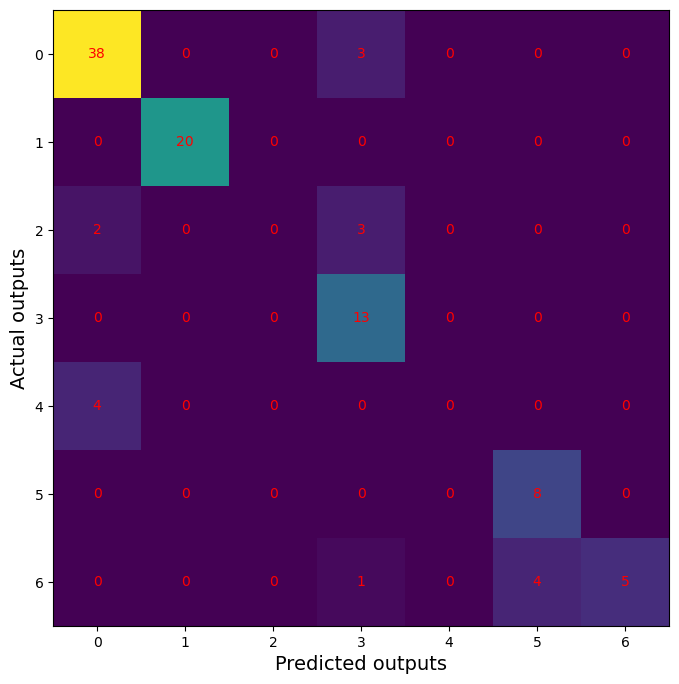

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10

KNN, 10 neighbors :

Training Accuracy Score :  80.0
Cross Validation Score : 74.82
Testing Accuracy Score :80.77
Precision Score is : 69.18
Recall Score is : 80.77
F1-Score Score is : 74.24


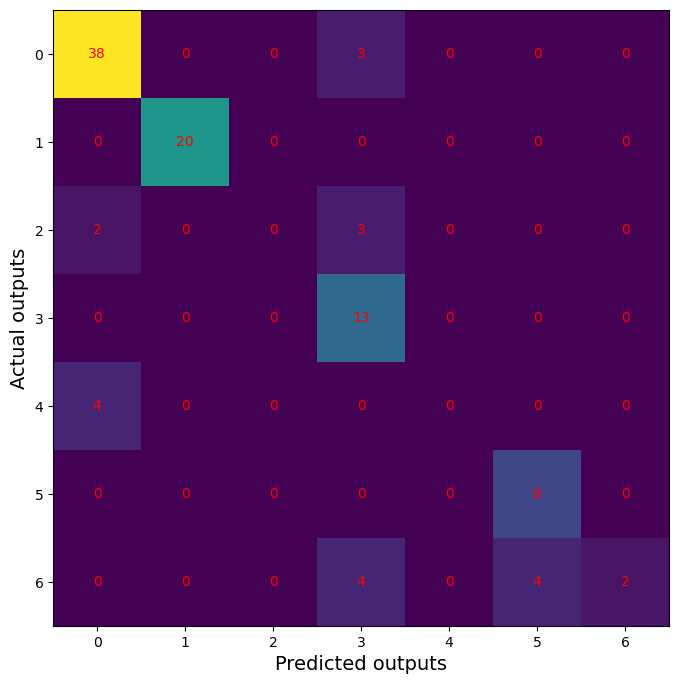

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10


In [14]:
for i in range(1, 11):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train.ravel())
    y_pred_KNN = KNN.predict(X_test.values)
    print(f"\nKNN, {i} neighbors :")
    Evaluate_Performance(KNN, X_train.values, X_test.values, y_train, y_test)

    cm = confusion_matrix (y, KNN.predict(X.values))

    fig, ax = plt.subplots (figsize = (8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
    ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
    
    for i in range(7):
        for j in range(7):
            ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
    
    plt.show()
    
    print(class1[['Class_Number', 'Class_Type', 'Number_Of_Animal_Species_In_Class']])

In [15]:
SVM_param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'degree': range(1, 8)}

SVM = SVC()
gridSVM = GridSearchCV(SVM, SVM_param, cv=10, n_jobs = -1, verbose=2)


gridSVM.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': range(1, 8), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [16]:
print(gridSVM.best_estimator_)
print(gridSVM.best_params_)
print(gridSVM.best_score_)

SVC(degree=1, kernel='linear')
{'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.9589285714285714



SVC, {'degree': 1, 'gamma': 'scale', 'kernel': 'linear'} :

Training Accuracy Score :  100.0
Cross Validation Score : 95.89
Testing Accuracy Score :92.31
Precision Score is : 86.22
Recall Score is : 92.31
F1-Score Score is : 88.91


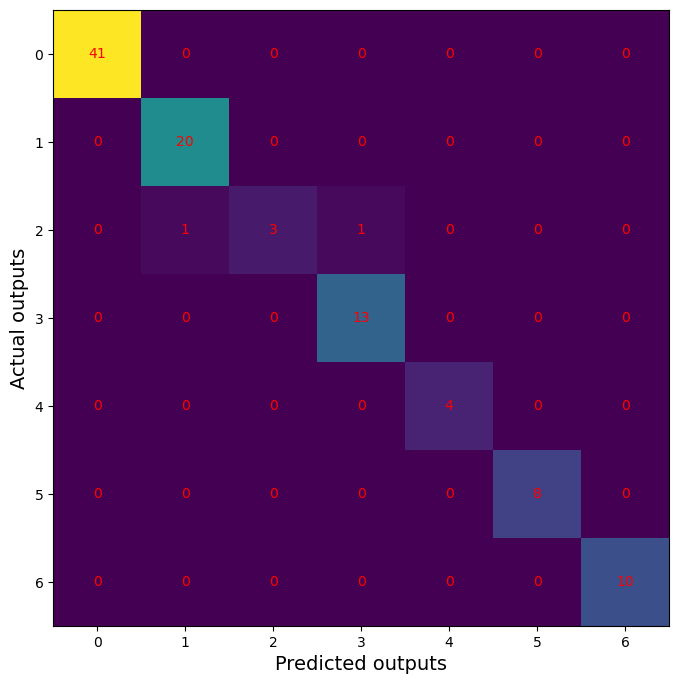

   Class_Number    Class_Type  Number_Of_Animal_Species_In_Class
0             1        Mammal                                 41
1             2          Bird                                 20
2             3       Reptile                                  5
3             4          Fish                                 13
4             5     Amphibian                                  4
5             6           Bug                                  8
6             7  Invertebrate                                 10


In [17]:
print(f"\nSVC, {gridSVM.best_params_} :")
Evaluate_Performance(gridSVM.best_estimator_, X_train, X_test, y_train, y_test)

cm = confusion_matrix (y, gridSVM.best_estimator_.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
    
for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
    
plt.show()
    
print(class1[['Class_Number', 'Class_Type', 'Number_Of_Animal_Species_In_Class']])

In [18]:
NB = GaussianNB()
NB.fit(X_train , y_train.ravel())
y_pred_NB = NB.predict(X_test)
print("Naive Bayes : ")
Evaluate_Performance(NB, X_train, X_test, y_train, y_test)

Naive Bayes : 

Training Accuracy Score :  100.0
Cross Validation Score : 98.75
Testing Accuracy Score :92.31
Precision Score is : 85.58
Recall Score is : 92.31
F1-Score Score is : 88.72


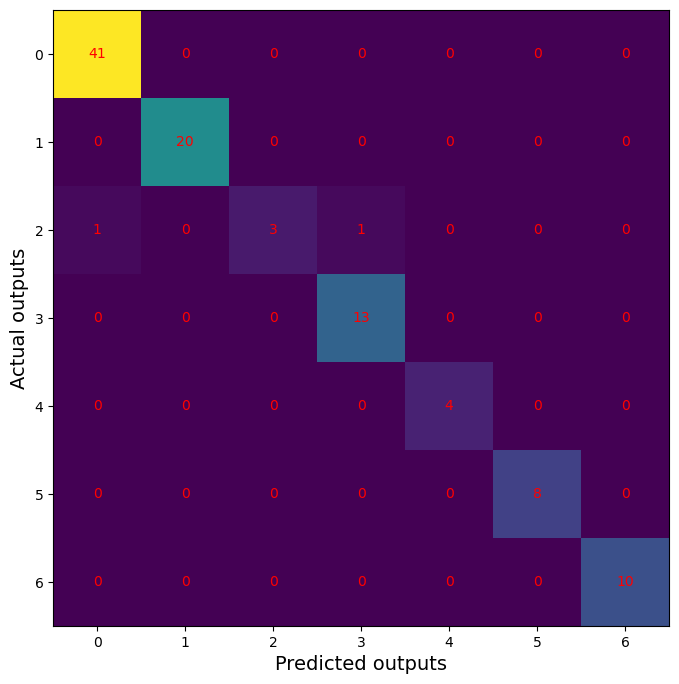

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [19]:
cm = confusion_matrix (y , NB.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(7))
ax.yaxis.set(ticks=range(7))
ax.set_ylim(6.5 , -0.5)

for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

class1

In [54]:
mlpc = MLPClassifier(activation='identity', hidden_layer_sizes=(8, 8, 4),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=1000,
              momentum=0.1, solver='sgd')

#mlpc_param = {'hidden_layer_sizes': [(8,), (8, 8), (8, 8, 8), (8,8,8,8), (8,8,8,8,8)],
#             'activation': ['identity', 'logistic', 'tanh', 'relu'],
#             'solver': ['lbfgs', 'sgd', 'adam'],
#             'learning_rate': ['constant', 'invscaling', 'adaptive'],
#             'momentum': [0.1, 0.3, 0.6, 0.9],
#             'learning_rate_init': [0.1, 0.01, 0.001],
#             'max_iter': [1000]}

#gridmlpc = GridSearchCV(mlpc, mlpc_param, cv=3, n_jobs=-1, verbose=2)
mlpc.fit(X_train , y_train.ravel())
y_pred_mlpc = mlpc.predict(X_test)
print("MLP Classifier : ")
Evaluate_Performance(mlpc, X_train, X_test, y_train, y_test)

MLP Classifier : 

Training Accuracy Score :  100.0
Cross Validation Score : 90.36
Testing Accuracy Score :92.31
Precision Score is : 95.19
Recall Score is : 92.31
F1-Score Score is : 92.2


MLPClassifier(activation='identity', hidden_layer_sizes=(8, 8, 8),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=1000,
              momentum=0.1, solver='sgd')
{'activation': 'identity', 'hidden_layer_sizes': (8, 8, 8), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 1000, 'momentum': 0.1, 'solver': 'sgd'}
0.9733333333333333


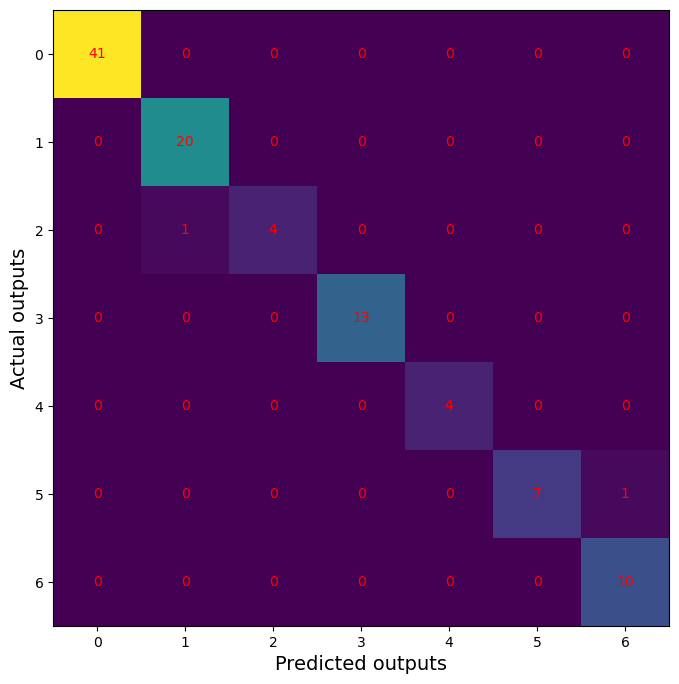

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [55]:
print(gridmlpc.best_estimator_)
print(gridmlpc.best_params_)
print(gridmlpc.best_score_)

cm = confusion_matrix (y, mlpc.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(7))
ax.yaxis.set(ticks=range(7))
ax.set_ylim(6.5 , -0.5)

for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

class1

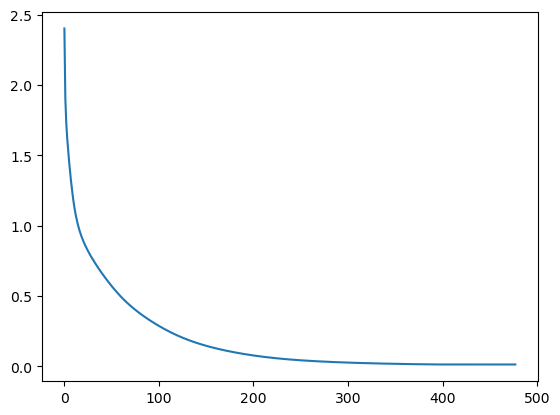

In [64]:
plt.plot(np.array(mlpc.loss_curve_))
plt.show()